This notebook presents the MCGLM usage in two examples, both used for my Master's qualification.

### First Example
 
`Sleepstudy` is a study of sleep deprivation.
https://www.rdocumentation.org/packages/lme4/versions/1.1-26/topics/sleepstudy


Gaussian Mixed Model is good model for fitting this longitudinal data. MCGLM can fit Gaussian Mixed Model, moreover with another specifications.

In [1]:
import sys
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns


from mcglm import MCGLM, mc_mixed, mc_id
from patsy import dmatrix, Poly


plt.style.use('fivethirtyeight')
#sns.set(rc={'figure.figsize':(8.5, 5)})

In [18]:
# Pulling the dataset
sleepstudy = pd.read_csv('first_simulation/sleepstudy.csv', dtype={'Subject': 'str'})

sleepstudy.head(10)

,Reaction,Days,Subject
0,249.5600,0,308
1,258.7047,1,308
2,250.8006,2,308
3,321.4398,3,308
4,356.8519,4,308
5,414.6901,5,308
6,382.2038,6,308
7,290.1486,7,308
8,430.5853,8,308
9,466.3535,9,308


In [19]:
sleepstudy.describe()

,Reaction,Days
count,180.000000,180.000000
mean,298.507892,4.500000
std,56.328757,2.880293
min,194.332200,0.000000
25%,255.375825,2.000000
50%,288.650800,4.500000
75%,336.752075,7.000000
max,466.353500,9.000000


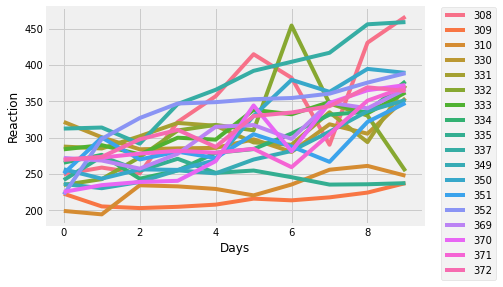

In [20]:
_ = sns.lineplot(x='Days', y='Reaction', hue='Subject', data=sleepstudy)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [21]:
X = dmatrix('~ Days', sleepstudy, return_type="dataframe")

In [22]:
# Z specification
Z = [mc_id(sleepstudy)] + mc_mixed(formula='~ 0 + Subject / Days', data = sleepstudy)

In [23]:
# Model fitting
mcglm = MCGLM(
    endog=sleepstudy['Reaction'],
    exog=X,
    z=Z
)

mcglmresults = mcglm.fit()

In [24]:
mcglmresults.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
           Multivariate covariance Generalized Linear Model Results           
==============================================================================
Dep. Variable:               Reaction   No. Iterations:                      2
Model:                              M                     C                  G
link:                        identity   Df Residuals:                      178
variance:                    constant   Df Model:                            1
Method:              Quasi-Likelihood   Power-fixed:                      True
Date:                Wed, 22 Jun 2022   pAIC                           1573.94
Time:                        19:21:45   pBIC                           1577.13
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    251.4051      6.632     37.906      0.000     238.406     264.404
Days          10.4673      1.502      6.968      0.000       7.523      13.412
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
dispersion_1   654.9420     70.624      9.274      0.000     516.521     793.363
dispersion_2   565.5150    264.679      2.137      0.033      46.753    1084.277
dispersion_3    32.6820     13.560      2.410      0.016       6.105      59.259
dispersion_4    11.0550     42.948      0.257      0.797     -73.121      95.231
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
power_         1.0000        nan        nan        nan         nan         nan
==============================================================================
"""

Text(0, 0.5, 'pearson residual')

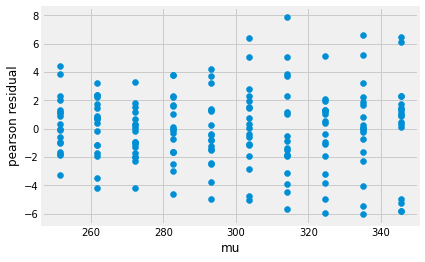

In [25]:
plt.scatter(mcglmresults.mu, mcglmresults.pearson_residue)
plt.xlabel('mu')
plt.ylabel('pearson residual')

In [29]:
# Model fitting
mcglm = MCGLM(
    endog=sleepstudy["Reaction"],
    exog=X,
    z=Z,
    link="log",
    variance="tweedie",
    power=1.5
)

mcglmresults = mcglm.fit()

In [30]:
mcglmresults.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
           Multivariate covariance Generalized Linear Model Results           
==============================================================================
Dep. Variable:               Reaction   No. Iterations:                      1
Model:                              M                     C                  G
link:                             log   Df Residuals:                      178
variance:                     tweedie   Df Model:                            1
Method:              Quasi-Likelihood   Power-fixed:                      True
Date:                Wed, 22 Jun 2022   pAIC                           1569.29
Time:                        19:22:37   pBIC                           1572.48
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.5359      0.026    215.559      0.000       5.486       5.586
Days           0.0352      0.004      7.864      0.000       0.026       0.044
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
dispersion_1     0.1230      0.012     10.288      0.000       0.100       0.146
dispersion_2     0.1480      0.064      2.325      0.020       0.023       0.273
dispersion_3     0.0050      0.002      2.276      0.023       0.001       0.009
dispersion_4         -0      0.009         -0      1.000      -0.017       0.017
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
power_         1.5000        nan        nan        nan         nan         nan
==============================================================================
"""

Text(0, 0.5, 'pearson residual')

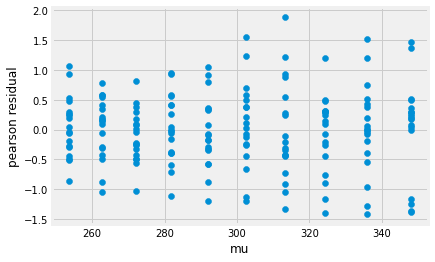

In [31]:
plt.scatter(mcglmresults.mu, mcglmresults.pearson_residue)
plt.xlabel('mu')
plt.ylabel('pearson residual')

### Second Example
 
`Soya` is a dataset that stores an experiment of Universidade Federal da Grande Dourados in Dourados, Mato Grosso do Sul, Brazil. Description:    
https://github.com/walmes/wzRfun/blob/master/R/wzRfun.R#L10   
http://ccarevista.ufc.br/seer/index.php/ccarevista/article/view/1454  

The experiment collected data about different treatments of potassium, water and blocks for soil farming. The pivotal traits to be studied are: grain size, total seeds and viable peas. In the following, MCGLM was used to fit into this data that has three unique kinds of answers: continuous, count and binomial.

In [13]:
soya = pd.read_csv('fourth_simulation/soya.csv', dtype={'block': 'str', 'water':'str', 'pot':'str'})

soya['viablepeasP'] = soya['viablepeas'] / soya['totalpeas']

In [14]:
soya.head(10)

,pot,water,block,grain,seeds,viablepeas,totalpeas,viablepeasP
0,0,37.5,I,14.55,136,22,56,0.392857
1,30,37.5,I,21.51,159,2,62,0.032258
2,60,37.5,I,24.62,156,0,66,0.000000
3,120,37.5,I,21.88,171,2,68,0.029412
4,180,37.5,I,28.11,190,0,82,0.000000
5,0,50,I,17.16,140,20,63,0.317460
6,30,50,I,24.44,193,6,86,0.069767
7,60,50,I,28.50,200,6,94,0.063830
8,120,50,I,32.94,208,7,86,0.081395
9,180,50,I,28.76,237,10,97,0.103093


In [15]:
soya['viablepeasP'] = soya['viablepeas'] / soya['totalpeas']


X = dmatrix('~ block + water * pot', soya, return_type="dataframe")

In [16]:
# Model fitting
mcglm = MCGLM(
    endog=[soya['grain'], soya['seeds'], soya['viablepeasP']],
    exog=[X, X, X],
    z=[[mc_id(soya)], [mc_id(soya)], [mc_id(soya)]],
    link=['identity', 'log', 'logit'],
    variance=['constant', 'tweedie', 'binomialP'],
    power_fixed=[True, True, True],
    ntrial=[None, None, soya['totalpeas'].values]
)


mcglmresults = mcglm.fit()

In [17]:
mcglmresults.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
           Multivariate covariance Generalized Linear Model Results           
==============================================================================
Dep. Variable:                  grain   No. Iterations:                      1
Model:                              M                     C                  G
link:                        identity   Df Residuals:                       56
variance:                    constant   Df Model:                           18
Method:              Quasi-Likelihood   Power-fixed:                      True
Date:                Wed, 22 Jun 2022   pAIC                            444.34
Time:                        19:18:43   pBIC                            505.83
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   14.2456      1.218     11.699      0.000      11.859      16.632
block[T.II]                  1.1324      0.880      1.286      0.198      -0.593       2.858
block[T.III]                -0.7801      0.880     -0.886      0.376      -2.506       0.946
block[T.IV]                 -1.5492      0.880     -1.760      0.078      -3.275       0.176
block[T.V]                  -2.3871      0.880     -2.711      0.007      -4.113      -0.661
water[T.50]                  2.1661      1.531      1.415      0.157      -0.835       5.167
water[T.62.5]                2.5404      1.531      1.659      0.097      -0.460       5.541
pot[T.120]                  11.7898      1.531      7.701      0.000       8.789      14.790
pot[T.180]                  11.8633      1.531      7.749      0.000       8.863      14.864
pot[T.30]                    6.7895      1.531      4.435      0.000       3.789       9.790
pot[T.60]                   10.3978      1.531      6.792      0.000       7.397      13.399
water[T.50]:pot[T.120]       2.2543      2.165      1.041      0.298      -1.989       6.498
water[T.62.5]:pot[T.120]     5.5828      2.165      2.578      0.010       1.339       9.826
water[T.50]:pot[T.180]       1.2096      2.165      0.559      0.576      -3.034       5.453
water[T.62.5]:pot[T.180]     9.2389      2.165      4.267      0.000       4.995      13.483
water[T.50]:pot[T.30]        0.1067      2.165      0.049      0.961      -4.137       4.350
water[T.62.5]:pot[T.30]     -1.8678      2.165     -0.863      0.388      -6.112       2.376
water[T.50]:pot[T.60]        2.6034      2.165      1.202      0.229      -1.640       6.847
water[T.62.5]:pot[T.60]      3.3586      2.165      1.551      0.121      -0.885       7.602
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
dispersion_1     5.8620      1.671      3.508      0.000       2.587       9.137
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
power_         1.0000        nan        nan        nan         nan         nan
           Multivariate covariance Generalized Linear Model Results           
==============================================================================
Dep. Variable:                  seeds   No. Iterations:                      1
Model:                              M                     C                  G
link:                             log   Df Residuals:                       56
variance:                     tweedie   Df Model:                           18
Method:              Quasi-Likelihood   Power-fixed:                      True
Da